<a href="https://colab.research.google.com/github/kelgruber/hand-gesture-classification/blob/main/Kel_Gruber_Final_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project Task 1: Building an Overfitting Model

Kel Gruber

## Dataset - Hand Gesture Classification

Goal of this project is build a model that correctly classifies images of 5 different hand gestures. Dataset consists of over 2650 digital colored images that belong to 5 classes: dislike, like, peace, one, and stop. 2500 images came from the crowdsourced HaGRID dataset and 150 images were taken by Kel Gruber and classmate volunteers following the Hagrid dataset's collection guidelines.

The 2500 images originally came from this [HaGRID Sample 30k 384p Dataset](https://www.kaggle.com/datasets/innominate817/hagrid-sample-30k-384p) on Kaggle, this sample contains 30,000 images and all 18 classes.

##1. Load Original Dataset

### Connect to Drive

###Connect to Drive, Unzip, and Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
zip_train = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/5390 Final Project/Original_Dataset_All_Data.zip')
zip_train.extractall('/tmp')
zip_train.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255)
original_image_length = 200

original_overfit_data  = image_generator.flow_from_directory( '/tmp/Final_Dataset_All_Data', target_size=(original_image_length, original_image_length ), batch_size=1, class_mode='categorical')
print(original_overfit_data.image_shape)

Found 2649 images belonging to 5 classes.
(200, 200, 3)


###View Some Examples from the Original Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

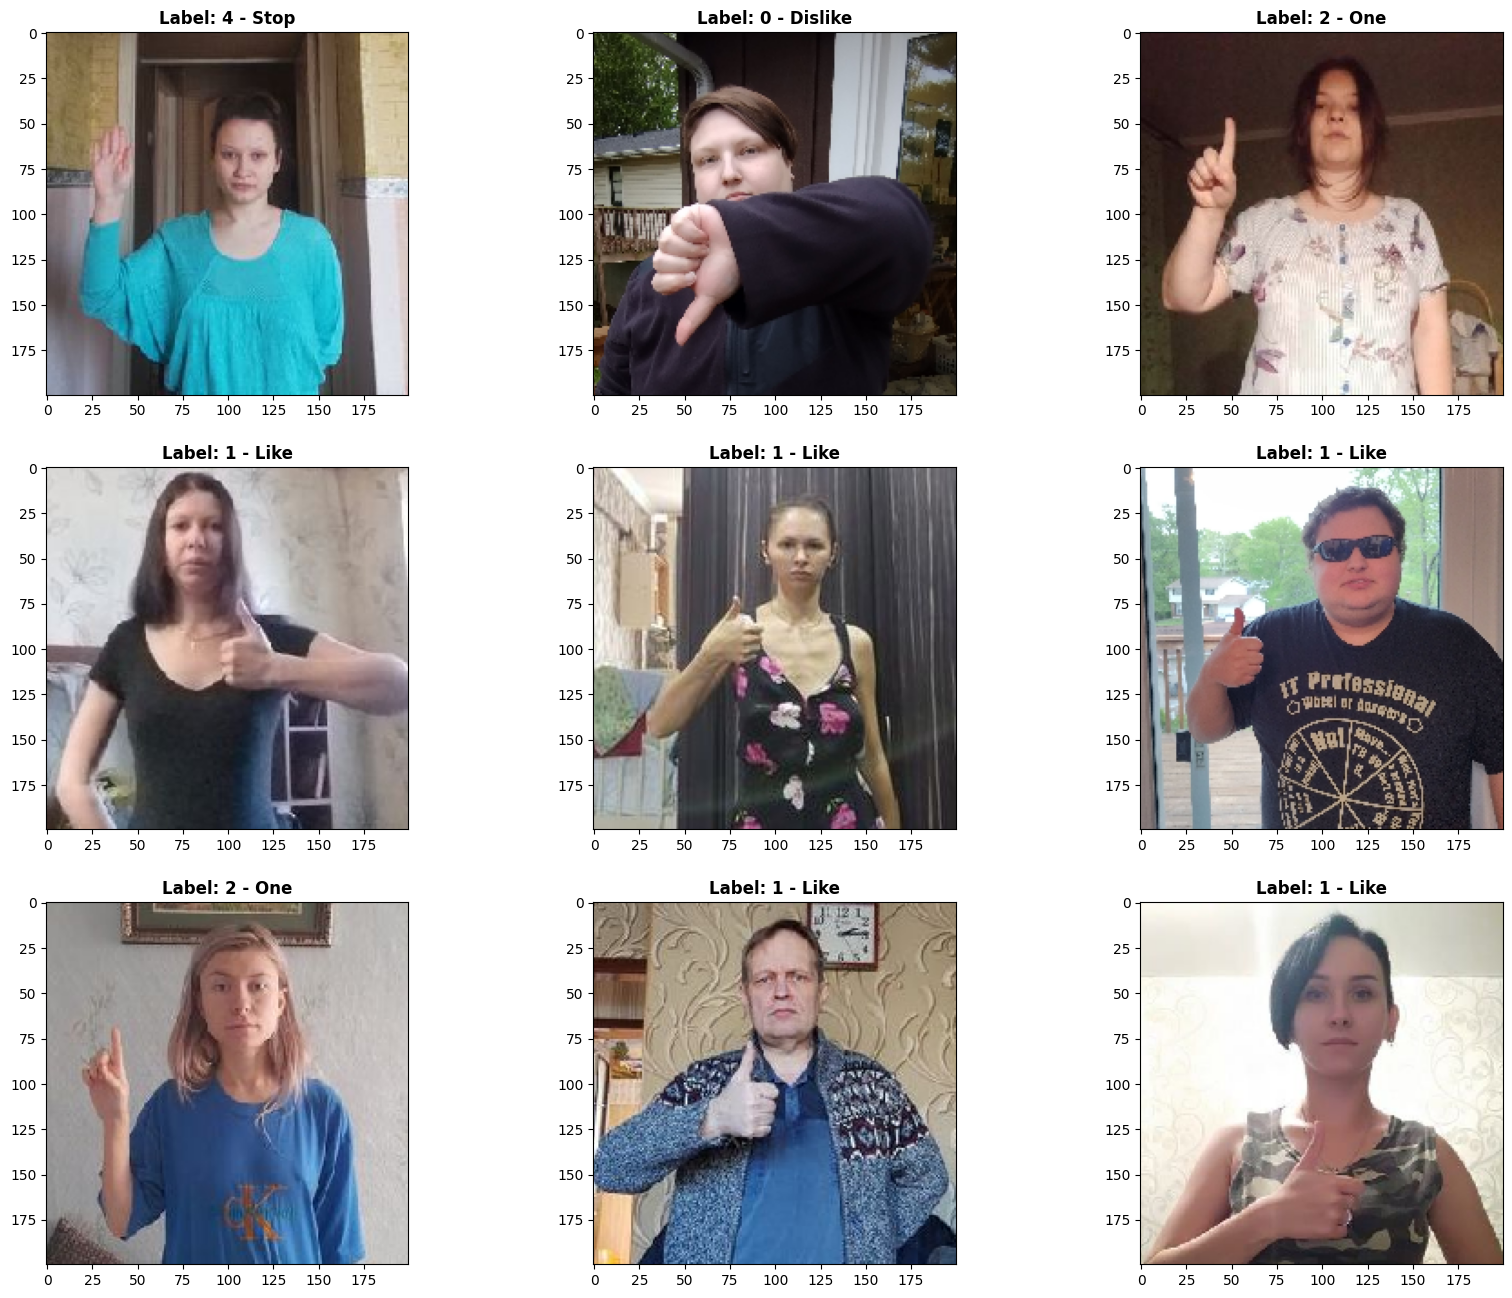

In [ ]:
i = 3
label_category = {0: "Dislike", 1: "Like", 2: "One", 3: "Peace", 4: "Stop"}

images = []
labels = []
for i in range(9):
    image, label = next(original_overfit_data)
    images.append(image)
    labels.append(label)

labels = np.array(labels)
labels = np.squeeze(labels)
labels = np.argmax(labels, axis=1)
labels = list(labels)

# Plotting the images
plt.figure(figsize=(20,16))
for i in range(0,9):
    row = i // 3  # Calculate row index
    column = i % 3  # Calculate column index
    plt.subplot(3, 3, i + 1)
    plt.title(f'Label: {labels[i]} - {label_category[labels[i]]}',fontweight='bold')
    plt.imshow(images[i].squeeze())
plt.show()

##2. Build an Overfit Model

My initial models were small, only a few convolutional layers similar to the practice project model with 3-4 convolutional layers and 1-2 maxpool layers. However it quickly became clear that these models were not big enough to learn to the data. When training these model struggled to learn and never made it past the common sense baseline for 5 balanced classes which is 20% accuracy. To get a better feel for how deep of model I should try next I decided to try some pretrained models with different architectures first and see if any of them could overfit the data.

The Pretrained Models:
- VGG16
- DenseNet121
- ResNet50

Results of these Experiments are in notebook [Task 1 Additional Experiments: Using Pre-trained Models to try to Overfit on the Original Data.](https://colab.research.google.com/drive/1QVOBz627_msnsDIUk5kpmkEXtK6-Rt33?usp=sharing) From these experiments VGG16 and DenseNet121 learned from the data in these while ResNet 50 did not. So I decided to try to make some models with similar architectures to see if these would have better results than my initial small models.  

###2.1 VGG Inspired 4 Block Model


VGG16 achieved approximately 51% accuracy on the whole dataset, so I decided to try some VGG inspired architectures. VGG stands for Visual Geometry Group and is a VGG model is made up of blocks, which are each made up of 2D Convolution and Max Pooling layers. As the number of layers increase the model should be capable of fitting more complex functions.

Model Structure:
- 4 Blocks containing 2 Convolutional layers each with 64, 128, and 256 kernels, each layer using a relu activation function and 1 MaxPooling Layer
al layers with (2,2) pooling windows per block
- 1 Flatten Layer after the 3rd convolutional layer
- 2 Dense layers with 256 and 5 neurons form the Classification head using a relu and softmax activation function, respectively

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
overfit_model_1 = Sequential()

# Block 1
overfit_model_1.add(Conv2D(64, (3, 3), activation='relu', input_shape = original_overfit_data.image_shape))
overfit_model_1.add(Conv2D(64, (3, 3), activation='relu'))
overfit_model_1.add(MaxPool2D((2, 2)))

# Block 2
overfit_model_1.add(Conv2D(128, (3, 3), activation='relu'))
overfit_model_1.add(Conv2D(128, (3, 3), activation='relu'))
overfit_model_1.add(MaxPool2D((2, 2)))

# Block 3
overfit_model_1.add(Conv2D(256, (3, 3), activation='relu'))
overfit_model_1.add(Conv2D(256, (3, 3), activation='relu'))
overfit_model_1.add(MaxPool2D((2, 2)))

# Block 4
overfit_model_1.add(Conv2D(256, (3, 3), activation='relu'))
overfit_model_1.add(Conv2D(256, (3, 3), activation='relu'))
overfit_model_1.add(MaxPool2D((2, 2)))

# Classification Head
overfit_model_1.add(Flatten())
overfit_model_1.add(Dense(256, activation='relu'))
overfit_model_1.add(Dropout(0.5))
overfit_model_1.add(Dense(5, activation='softmax'))

overfit_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 196, 196, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 94, 94, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 47, 47, 128)       0         
 g2D)                                                 

In [ ]:
overfit_model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history1 = overfit_model_1.fit(original_overfit_data, epochs = 100, batch_size = 64)

Epoch 1/100
2650/2650 [==============================] - 40s 13ms/step - loss: 1.6133 - accuracy: 0.1751
Epoch 2/100
2650/2650 [==============================] - 31s 12ms/step - loss: 1.6105 - accuracy: 0.1864
Epoch 3/100
2650/2650 [==============================] - 31s 12ms/step - loss: 1.6102 - accuracy: 0.1936
Epoch 4/100
2650/2650 [==============================] - 31s 12ms/step - loss: 1.6103 - accuracy: 0.2023
Epoch 5/100
2650/2650 [==============================] - 31s 12ms/step - loss: 1.6104 - accuracy: 0.1921
Epoch 6/100
2650/2650 [==============================] - 31s 12ms/step - loss: 1.6102 - accuracy: 0.1808
Epoch 7/100
2650/2650 [==============================] - 31s 12ms/step - loss: 1.6103 - accuracy: 0.1883
Epoch 8/100
2650/2650 [==============================] - 31s 12ms/step - loss: 1.6104 - accuracy: 0.1906
Epoch 9/100
2650/2650 [==============================] - 31s 12ms/step - loss: 1.6102 - accuracy: 0.1928
Epoch 10/100
2650/2650 [==============================]

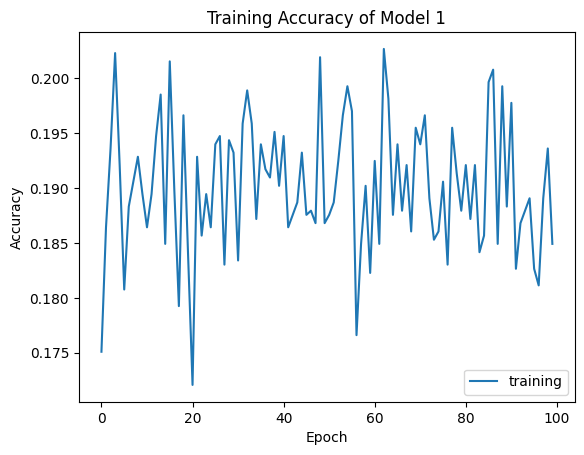

In [ ]:
plt.title('Training Accuracy of Model 1')
plt.plot(history1.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
loss, acc = overfit_model_1.evaluate(original_overfit_data)

print(f'Accuracy: {acc*100.0}')
print(f'Loss:{loss}')

2650/2650 [==============================] - 13s 5ms/step - loss: 1.6095 - accuracy: 0.2000
Accuracy: 20.000000298023224
Loss:1.6094785928726196


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(original_overfit_data)):
   x, y = original_overfit_data.next()
   p = overfit_model_1.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.20075471698113206
Precision: 0.040302456390174435
Recall: 0.20075471698113206
F1 Score: 0.06712854144183673


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###2.2 Deeper VGG Inspired 5 Blocks Model

Model Structure:
- 5 Blocks containing 2 Convolutional layers each with 64, 128, and 256 kernels, each layer using a relu activation function and 1 MaxPooling Layer
al layers with (2,2) pooling windows per block
- 1 Flatten Layer after the 3rd convolutional layer
- One Dropout Layer since the model has a significant number of parameters and this can make training even more difficult for the model
- 2 Dense layers with 256 and 5 neurons form the Classification head using a relu and softmax activation function, respectively

In [ ]:
overfit_model_1_2 = Sequential()

# Block 1
overfit_model_1_2.add(Conv2D(16, (3, 3), activation='relu', input_shape = original_overfit_data.image_shape))
overfit_model_1_2.add(Conv2D(16, (3, 3), activation='relu'))
overfit_model_1_2.add(MaxPool2D((2, 2)))

# Block 2
overfit_model_1_2.add(Conv2D(32, (3, 3), activation='relu'))
overfit_model_1_2.add(Conv2D(32, (3, 3), activation='relu'))
overfit_model_1_2.add(MaxPool2D((2, 2)))

# Block 3
overfit_model_1_2.add(Conv2D(64, (3, 3), activation='relu'))
overfit_model_1_2.add(Conv2D(64, (3, 3), activation='relu'))
overfit_model_1_2.add(MaxPool2D((2, 2)))

# Block 4
overfit_model_1_2.add(Conv2D(128, (3, 3), activation='relu'))
overfit_model_1_2.add(Conv2D(128, (3, 3), activation='relu'))
overfit_model_1_2.add(MaxPool2D((2, 2)))

# Block 5
overfit_model_1_2.add(Conv2D(256, (3, 3), activation='relu'))
overfit_model_1_2.add(Conv2D(256, (3, 3), activation='relu'))
overfit_model_1_2.add(MaxPool2D((2, 2)))

# Classification Head
overfit_model_1_2.add(Flatten())
overfit_model_1_2.add(Dense(256, activation='relu'))
overfit_model_1_2.add(Dropout(0.5))
overfit_model_1_2.add(Dense(5, activation='softmax'))

overfit_model_1_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 conv2d_33 (Conv2D)          (None, 196, 196, 16)      2320      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 98, 98, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 96, 96, 32)        4640      
                                                                 
 conv2d_35 (Conv2D)          (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 47, 47, 32)        0         
 ng2D)                                                

In [ ]:
overfit_model_1_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history1_2 = overfit_model_1_2.fit(original_overfit_data, epochs = 50, batch_size = 64)

Epoch 1/50
2650/2650 [==============================] - 20s 6ms/step - loss: 1.6103 - accuracy: 0.1894
Epoch 2/50
2650/2650 [==============================] - 19s 7ms/step - loss: 1.6102 - accuracy: 0.1906
Epoch 3/50
2650/2650 [==============================] - 19s 7ms/step - loss: 1.6103 - accuracy: 0.1947
Epoch 4/50
2650/2650 [==============================] - 20s 7ms/step - loss: 1.6102 - accuracy: 0.1909
Epoch 5/50
2650/2650 [==============================] - 19s 7ms/step - loss: 1.6103 - accuracy: 0.1777
Epoch 6/50
2650/2650 [==============================] - 18s 7ms/step - loss: 1.6102 - accuracy: 0.1951
Epoch 7/50
2650/2650 [==============================] - 18s 7ms/step - loss: 1.6103 - accuracy: 0.1864
Epoch 8/50
2650/2650 [==============================] - 18s 7ms/step - loss: 1.6103 - accuracy: 0.1955
Epoch 9/50
2650/2650 [==============================] - 18s 7ms/step - loss: 1.6103 - accuracy: 0.1909
Epoch 10/50
2650/2650 [==============================] - 18s 7ms/step - l

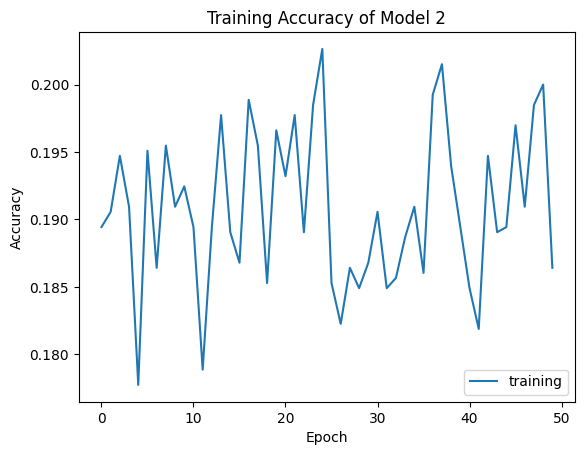

In [ ]:
plt.title('Training Accuracy of Model 2')
plt.plot(history1_2.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
loss, acc = overfit_model_1_2.evaluate(original_overfit_data)

print(f'Accuracy: {acc*100.0}')
print(f'Loss:{loss}')

2650/2650 [==============================] - 11s 4ms/step - loss: 1.6096 - accuracy: 0.2000
Accuracy: 20.000000298023224
Loss:1.609553575515747


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(original_overfit_data)):
   x, y = original_overfit_data.next()
   p = overfit_model_1_2.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.19924528301886793
Precision: 0.03969868280526878
Recall: 0.19924528301886793
F1 Score: 0.06620611040526259


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###2.3 Conclusion
At this point I have tried several different model architectures and all have struggled to learn. The best a model has achieved on this data was pretrained DenseNet121 which has 121 layers. I believe that this data is just too complex for my models at this time. I instead am going to try using data preprocessing and see if I can simplify my data in such a way that I can build a model that can learn it.

##3. Output as Input Model using the Original Data
If we provide the output as the input (as an additional channel), what is the smallest architecture (minimum number of layers and filters) needed to overfit the data?

This data has been too complicated for my beginner models to learn, but if I provide the output labels as input in a 4th channel what size model do I need to learn the data?

###3.1 Making a Dataset with Original Images that includes the Output as Input

In [ ]:
single_image_generator = image_generator.flow_from_directory( '/tmp/Original_Dataset_All_Data', target_size=(original_image_length, original_image_length), batch_size=1, class_mode='categorical')
mydatax = np.zeros((single_image_generator.n, original_image_length, original_image_length, 3 + 1))  # One additional channel for labels
mydatay = np.zeros((single_image_generator.n, 5))

# Read generator, and fill up the mydatax/mydatay arrays
for i in range(single_image_generator.n):
    x, y = single_image_generator.next()  # Get images and labels from the generator
    # y is one-hot encoded, need to convert y to a single value
    mydatax[i, :, :, :3] = x  # Existing image in the first three channels
    mydatax[i, :, :, 3] = np.argmax(y, axis=1)  # Label value as the last channel
    mydatay[i] = y

# Print shapes to verify
print("Images Shape:", mydatax.shape)
print("Labels Shape:", mydatay.shape)

Found 2650 images belonging to 5 classes.
Images Shape: (2650, 200, 200, 4)
Labels Shape: (2650, 5)


###3.2 Model 1: Using Output as Input
Using the original model architecture that I tried with this data.

Model Structure:
- 3 Convolutional layers with 64, 32, and 16 kernels, using a relu activation function
- 2 MaxPooling layers with (5,5) pooling windows
- 1 Flatten Layer after the third convulutional layer
- 1 Dense Layer with 5 neurons using a softmax activation function

In [ ]:
output_model_1 = Sequential()
output_model_1.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (original_image_length, original_image_length, 4) ) )
output_model_1.add( MaxPool2D(5, 5) )
output_model_1.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
output_model_1.add( MaxPool2D(5, 5) )
output_model_1.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
output_model_1.add( Flatten() )
output_model_1.add( Dense(5, activation = 'softmax' ) )

output_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 64)      2368      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 39, 39, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 16)          4624      
                                                                 
 flatten_1 (Flatten)         (None, 400)              

In [ ]:
output_model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history_output_1 = output_model_1.fit(mydatax, mydatay, epochs = 50, batch_size = 64)

Epoch 1/50
42/42 [==============================] - 8s 68ms/step - loss: 0.8160 - accuracy: 0.6049
Epoch 2/50
42/42 [==============================] - 2s 54ms/step - loss: 0.2114 - accuracy: 0.9109
Epoch 3/50
42/42 [==============================] - 2s 54ms/step - loss: 0.1302 - accuracy: 0.9502
Epoch 4/50
42/42 [==============================] - 2s 54ms/step - loss: 0.1244 - accuracy: 0.9475
Epoch 5/50
42/42 [==============================] - 2s 54ms/step - loss: 0.1238 - accuracy: 0.9536
Epoch 6/50
42/42 [==============================] - 2s 54ms/step - loss: 0.1073 - accuracy: 0.9653
Epoch 7/50
42/42 [==============================] - 2s 54ms/step - loss: 0.1220 - accuracy: 0.9525
Epoch 8/50
42/42 [==============================] - 2s 54ms/step - loss: 0.0485 - accuracy: 0.9838
Epoch 9/50
42/42 [==============================] - 2s 54ms/step - loss: 0.0387 - accuracy: 0.9864
Epoch 10/50
42/42 [==============================] - 2s 53ms/step - loss: 0.0320 - accuracy: 0.9883
Epoch 11/

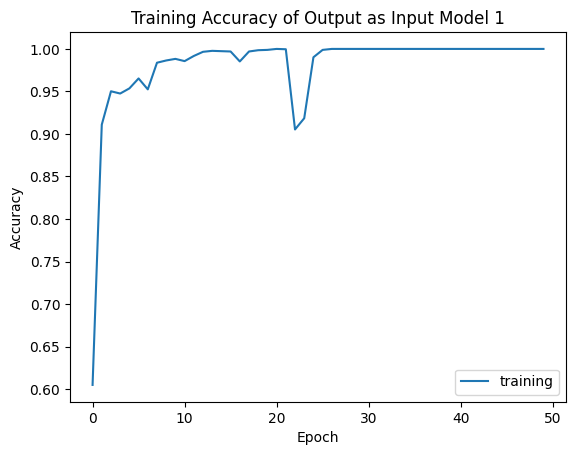

In [ ]:
plt.title('Training Accuracy of Output as Input Model 1')
plt.plot(history_output_1.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
predictions = output_model_1.predict(mydatax)

# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(predictions, axis=1)
Y_true = np.argmax(mydatay, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

83/83 [==============================] - 1s 11ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


###3.3 Model 2: An Even Shallower Output as Input
Model Structure:
- 1 Convolutional layers with 1 kernel, using a relu activation function
- 1 Flatten Layer after the third convulutional layer
- 1 Dense Layer with 5 neurons using a softmax activation function

In [ ]:
output_model_2 = Sequential()
output_model_2.add( Conv2D(1, ( 3, 3 ), activation = 'relu', input_shape = (original_image_length, original_image_length, 4) ) )
output_model_2.add( Flatten() )
output_model_2.add( Dense(5, activation = 'softmax' ) )

output_model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 1)       37        
                                                                 
 flatten_1 (Flatten)         (None, 39204)             0         
                                                                 
 dense_4 (Dense)             (None, 5)                 196025    
                                                                 
Total params: 196062 (765.87 KB)
Trainable params: 196062 (765.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
output_model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history_output_2 = output_model_2.fit(mydatax, mydatay, epochs = 50, batch_size = 64)

Epoch 1/50
42/42 [==============================] - 2s 21ms/step - loss: 3.6165 - accuracy: 0.2475
Epoch 2/50
42/42 [==============================] - 1s 19ms/step - loss: 1.4581 - accuracy: 0.3842
Epoch 3/50
42/42 [==============================] - 1s 19ms/step - loss: 1.3287 - accuracy: 0.4204
Epoch 4/50
42/42 [==============================] - 1s 18ms/step - loss: 1.2656 - accuracy: 0.4713
Epoch 5/50
42/42 [==============================] - 1s 19ms/step - loss: 1.2168 - accuracy: 0.5253
Epoch 6/50
42/42 [==============================] - 1s 19ms/step - loss: 1.1571 - accuracy: 0.5977
Epoch 7/50
42/42 [==============================] - 1s 19ms/step - loss: 1.2434 - accuracy: 0.5819
Epoch 8/50
42/42 [==============================] - 1s 19ms/step - loss: 1.1349 - accuracy: 0.6358
Epoch 9/50
42/42 [==============================] - 1s 19ms/step - loss: 1.0702 - accuracy: 0.6823
Epoch 10/50
42/42 [==============================] - 1s 19ms/step - loss: 1.0199 - accuracy: 0.7192
Epoch 11/

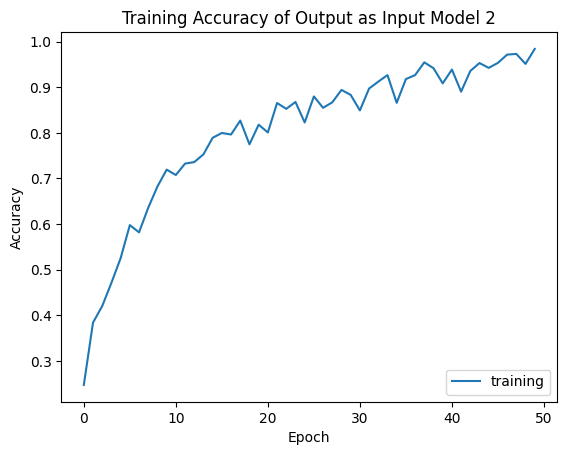

In [ ]:
plt.title('Training Accuracy of Output as Input Model 2')
plt.plot(history_output_2.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
history_output_2 = output_model_2.fit(mydatax, mydatay, epochs = 15, batch_size = 64)

Epoch 1/15
42/42 [==============================] - 1s 20ms/step - loss: 0.1786 - accuracy: 0.9868
Epoch 2/15
42/42 [==============================] - 1s 19ms/step - loss: 0.1931 - accuracy: 0.9717
Epoch 3/15
42/42 [==============================] - 1s 19ms/step - loss: 0.2034 - accuracy: 0.9668
Epoch 4/15
42/42 [==============================] - 1s 19ms/step - loss: 0.1664 - accuracy: 0.9830
Epoch 5/15
42/42 [==============================] - 1s 19ms/step - loss: 0.1362 - accuracy: 0.9883
Epoch 6/15
42/42 [==============================] - 1s 19ms/step - loss: 0.1232 - accuracy: 0.9936
Epoch 7/15
42/42 [==============================] - 1s 19ms/step - loss: 0.1356 - accuracy: 0.9864
Epoch 8/15
42/42 [==============================] - 1s 19ms/step - loss: 0.1217 - accuracy: 0.9906
Epoch 9/15
42/42 [==============================] - 1s 19ms/step - loss: 0.1074 - accuracy: 0.9898
Epoch 10/15
42/42 [==============================] - 1s 18ms/step - loss: 0.1057 - accuracy: 0.9902
Epoch 11/

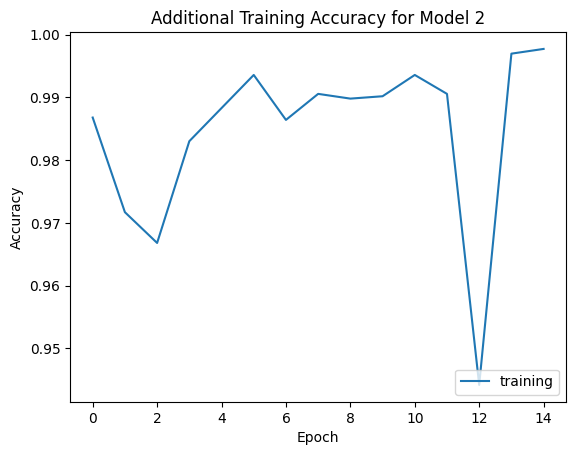

In [ ]:
plt.title('Additional Training Accuracy for Model 2')
plt.plot(history_output_2.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
predictions = output_model_2.predict(mydatax)

# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(predictions, axis=1)
Y_true = np.argmax(mydatay, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

83/83 [==============================] - 1s 15ms/step
Accuracy: 0.9977358490566037
Precision: 0.9977541932872205
Recall: 0.9977358490566037
F1 Score: 0.9977358067388574


###3.4 Conclusion

This data was too complicated for my beginner models to learn, but when I provide the output labels as input in a 4th channel you do not need a very large or deep model for it to overfit. It only took 65 epochs for the model to reach nearly 100% on all of the data when prior models could not even beat the commonsense baseline of 20%.

##4. Using a Revised Dataset

This new dataset was made using the images from in the original dataset images. Each image was cropped from one of the larger images in the original dataset to focus more on the hand gesture.

My models were struggling to learn the hand gestures from full larger images, likely due to the complexity of the original data where the hands were often small in relation to the rest of the image and moved around the image frequently. To address this, I cropped each image to focus more on the hand gesture, this increased the hand's relative size within the frame, and reducing background noise which allows for a simpler learning process with smaller models. This pre-processing step reduced the amount of irrelevant data the model needed to analyze, simplifying the learning task and allowing the model to learn the patterns needed to identify the different hand gestures.

#### Import Cropped Image Dataset


In [ ]:
import zipfile
import os
zip_train = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/5390 Final Project/Cropped_Dataset.zip')
zip_train.extractall('/tmp')
zip_train.close()

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255)
small_image_length = 100

crop_overfit_data  = image_generator.flow_from_directory( '/tmp/Cropped_Dataset', target_size=(small_image_length, small_image_length), batch_size=1, class_mode='categorical')
print(crop_overfit_data.image_shape)

Found 2650 images belonging to 5 classes.
(100, 100, 3)


####View Some Examples from the Cropped Dataset

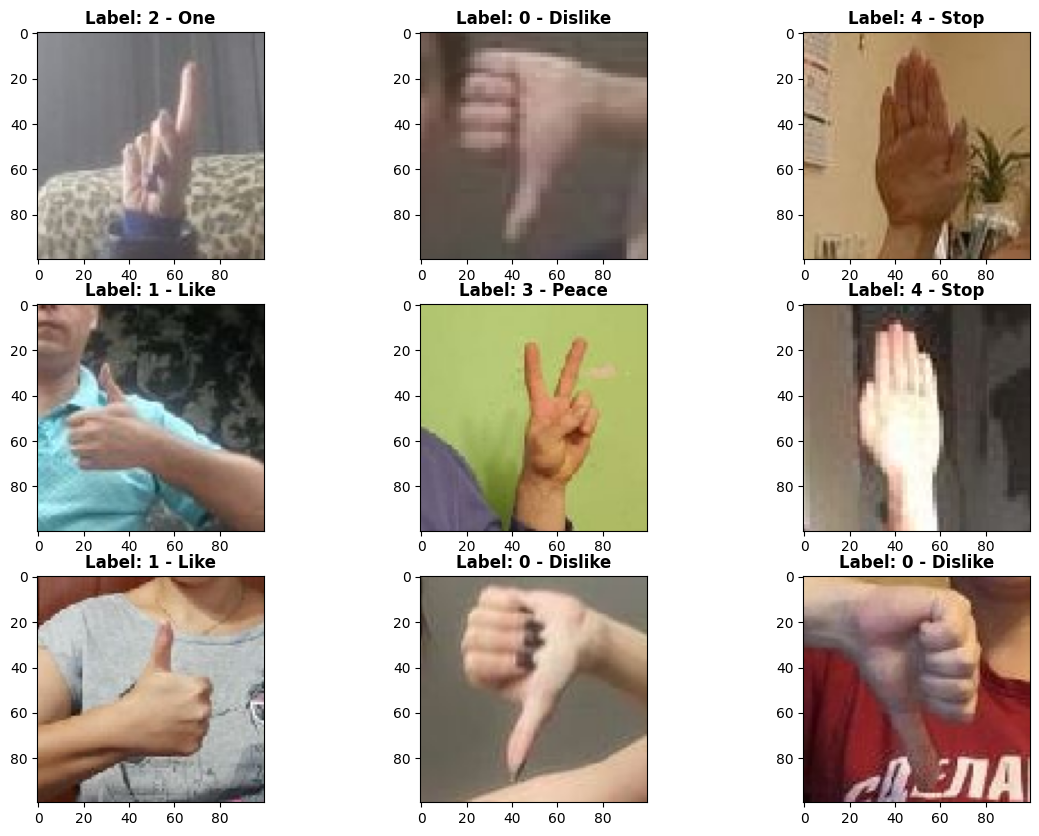

In [ ]:
i = 3
label_category = {0: "Dislike", 1: "Like", 2: "One", 3: "Peace", 4: "Stop"}

images = []
labels = []
for i in range(9):
    image, label = next(crop_overfit_data)
    images.append(image)
    labels.append(label)

labels = np.array(labels)
labels = np.squeeze(labels)
labels = np.argmax(labels, axis=1)
labels = list(labels)

# Plotting the images
plt.figure(figsize=(14,10))
for i in range(0,9):
    row = i // 3  # Calculate row index
    column = i % 3  # Calculate column index
    plt.subplot(3, 3, i + 1)
    plt.title(f'Label: {labels[i]} - {label_category[labels[i]]}',fontweight='bold')
    plt.imshow(images[i].squeeze())
plt.show()

###4.1 Revised Data Model 1


Model Structure:
- 3 Convolutional layers with 64, 32, and 16 kernels, each using a relu activation function
- 2 MaxPool layers that follow the first and second convolutional layers with a (4,4) and (2,2) pooling windows
- 1 Flatten Layer after the third convulutional layer
- 1 Dense Layer with 5 neurons using a softmax activation function


In [ ]:
overfit_model_2 = Sequential()
overfit_model_2.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = crop_overfit_data.image_shape ) )
overfit_model_2.add( MaxPool2D(4, 4) )
overfit_model_2.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
overfit_model_2.add( MaxPool2D(2, 2) )
overfit_model_2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
overfit_model_2.add( Flatten() )
overfit_model_2.add( Dense(5, activation = 'softmax' ) )

overfit_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 16)          4624      
                                                                 
 flatten (Flatten)           (None, 1296)              0

In [ ]:
overfit_model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history2 = overfit_model_2.fit(crop_overfit_data , epochs = 100, batch_size = 64)

Epoch 1/100
2650/2650 [==============================] - 15s 4ms/step - loss: 1.4834 - accuracy: 0.3170
Epoch 2/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.9218 - accuracy: 0.6581
Epoch 3/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.7239 - accuracy: 0.7362
Epoch 4/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.6464 - accuracy: 0.7687
Epoch 5/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.5722 - accuracy: 0.8004
Epoch 6/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.5329 - accuracy: 0.8166
Epoch 7/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.4681 - accuracy: 0.8366
Epoch 8/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.4307 - accuracy: 0.8389
Epoch 9/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.3964 - accuracy: 0.8581
Epoch 10/100
2650/2650 [==============================] - 10s 4m

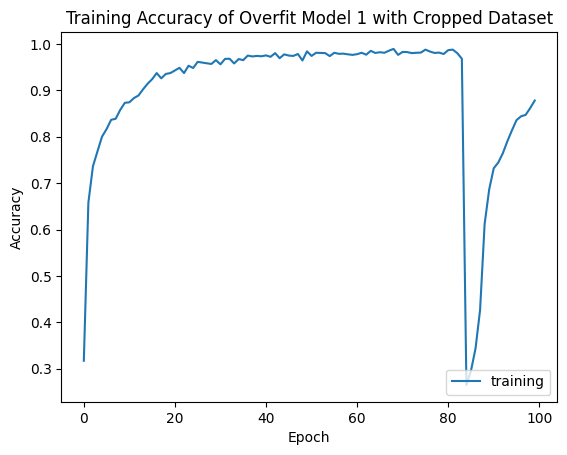

In [ ]:
plt.title('Training Accuracy of Overfit Model 1 with Cropped Dataset')
plt.plot(history2.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
loss, acc = overfit_model_2.evaluate(crop_overfit_data )

print(f'Accuracy: {acc*100.0}')
print(f'Loss:{loss}')

2650/2650 [==============================] - 7s 3ms/step - loss: 0.2820 - accuracy: 0.8962
Accuracy: 89.62264060974121
Loss:0.28201642632484436


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(crop_overfit_data )):
   x, y = crop_overfit_data.next()
   p = overfit_model_2.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8958490566037736
Precision: 0.8992995389767816
Recall: 0.8958490566037736
F1 Score: 0.896345105725184


###4.2 Revised Data Model 2
Model Structure:
- 3 Convolutional layers with 64, 32, and 16 kernels, each using a relu activation function
- 2 MaxPools that follow the first and second convolutional layers with larger filters of (7, 7) and (4,4) to reduce the parameters in the network even more
- 1 Flatten Layer after the 3rd convolutional layer
- 1 Dense layer with 5 neurons using a softmax activation function


In [ ]:
overfit_model_3 = Sequential()
overfit_model_3.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = crop_overfit_data.image_shape ) )
overfit_model_3.add( MaxPool2D(7, 7) )
overfit_model_3.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
overfit_model_3.add( MaxPool2D(4, 4) )
overfit_model_3.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
overfit_model_3.add( Flatten() )
overfit_model_3.add( Dense(5, activation = 'softmax' ) )

overfit_model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 16)          4624      
                                                                 
 flatten_1 (Flatten)         (None, 16)               

In [ ]:
overfit_model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history3 = overfit_model_3.fit(crop_overfit_data, epochs = 100, batch_size = 64)

Epoch 1/100
2650/2650 [==============================] - 11s 4ms/step - loss: 1.4608 - accuracy: 0.3287
Epoch 2/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.9886 - accuracy: 0.6064
Epoch 3/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.7776 - accuracy: 0.7075
Epoch 4/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.6508 - accuracy: 0.7581
Epoch 5/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.5714 - accuracy: 0.7940
Epoch 6/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.5104 - accuracy: 0.8106
Epoch 7/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.4495 - accuracy: 0.8313
Epoch 8/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.4010 - accuracy: 0.8494
Epoch 9/100
2650/2650 [==============================] - 10s 4ms/step - loss: 0.3688 - accuracy: 0.8577
Epoch 10/100
2650/2650 [==============================] - 10s 4m

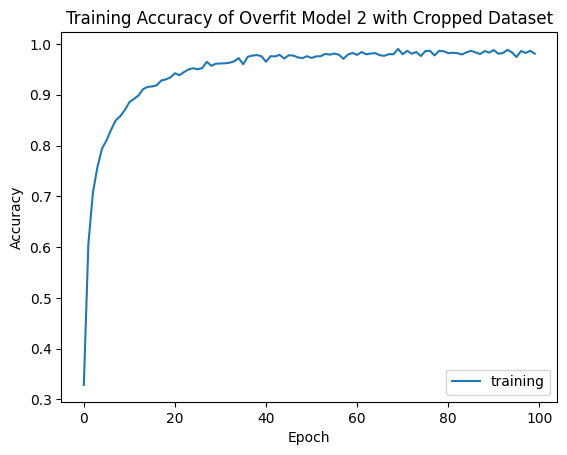

In [ ]:
plt.title('Training Accuracy of Overfit Model 2 with Cropped Dataset')
plt.plot(history3.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
loss, acc = overfit_model_3.evaluate(crop_overfit_data)

print(f'Accuracy: {acc*100.0}')
print(f'Loss:{loss}')

2650/2650 [==============================] - 7s 3ms/step - loss: 0.0821 - accuracy: 0.9755
Accuracy: 97.54716753959656
Loss:0.08213931322097778


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(crop_overfit_data)):
   x, y = crop_overfit_data.next()
   p = overfit_model_3.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9754716981132076
Precision: 0.9762507555603739
Recall: 0.9754716981132076
F1 Score: 0.97528359950778


###4.3 Revised Data Model 3

Model Structure:
- 4 Convolutional layers with 96, 64, 32, and 16 kernels, each using a relu activation function
- 3 MaxPool layers that follow the first and second convolutional layers with a (4,4), (2,2) and (2,2) pooling windows
- 1 Flatten Layer after the third convulutional layer
- 1 Dense Layer with 5 neurons using a softmax activation function

In [ ]:
overfit_model_4 = Sequential()

overfit_model_4.add( Conv2D( 96, ( 3, 3 ), activation = 'relu', input_shape = crop_overfit_data.image_shape ) )
overfit_model_4.add( MaxPool2D(4, 4) )
overfit_model_4.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
overfit_model_4.add( MaxPool2D(2, 2) )
overfit_model_4.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
overfit_model_4.add( MaxPool2D(2, 2) )
overfit_model_4.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
overfit_model_4.add( Flatten() )
overfit_model_4.add( Dense(5, activation = 'softmax' ) )

overfit_model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 98, 98, 96)        2688      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 24, 24, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 22, 22, 64)        55360     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 4, 4, 32)         

In [ ]:
overfit_model_4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history4 = overfit_model_4.fit(crop_overfit_data, epochs = 100, batch_size = 64)

Epoch 1/100
2650/2650 [==============================] - 13s 4ms/step - loss: 1.3377 - accuracy: 0.4294
Epoch 2/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.9730 - accuracy: 0.6313
Epoch 3/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.7599 - accuracy: 0.7064
Epoch 4/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.6116 - accuracy: 0.7762
Epoch 5/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.5222 - accuracy: 0.8019
Epoch 6/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.4471 - accuracy: 0.8343
Epoch 7/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.3678 - accuracy: 0.8566
Epoch 8/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.3341 - accuracy: 0.8736
Epoch 9/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.2875 - accuracy: 0.8955
Epoch 10/100
2650/2650 [==============================] - 11s 4m

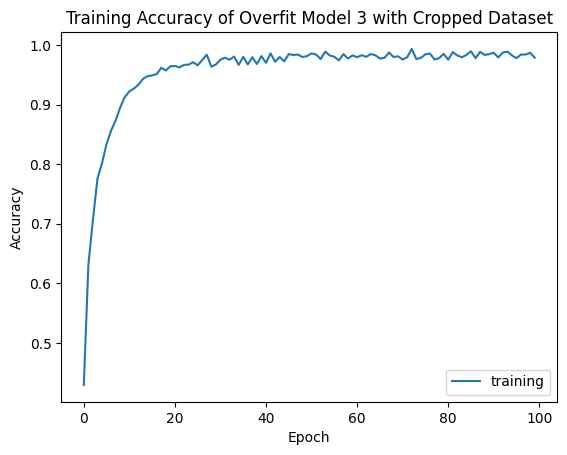

In [ ]:
plt.title('Training Accuracy of Overfit Model 3 with Cropped Dataset')
plt.plot(history4.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
loss, acc = overfit_model_4.evaluate(crop_overfit_data)

print(f'Accuracy: {acc*100.0}')
print(f'Loss:{loss}')

2650/2650 [==============================] - 7s 3ms/step - loss: 0.1386 - accuracy: 0.9728
Accuracy: 97.28301763534546
Loss:0.13857360184192657


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(crop_overfit_data)):
   x, y = crop_overfit_data.next()
   p = overfit_model_4.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9728301886792453
Precision: 0.9733671061534379
Recall: 0.9728301886792453
F1 Score: 0.9728150572998993


###4.3 Revised Data Model 4

Model Structure:
- 4 Convolutional layers with 128, 64, 32, and 16 kernels, each using a relu activation function
- 3 MaxPool layers that follow the first and second convolutional layers with a (4,4), (2,2) and (2,2) pooling windows
- 1 Flatten Layer after the third convulutional layer
- 1 Dense Layer with 5 neurons using a softmax activation function

In [ ]:
overfit_model_5 = Sequential()

overfit_model_5.add( Conv2D( 128, ( 3, 3 ), activation = 'relu', input_shape = crop_overfit_data.image_shape ) )
overfit_model_5.add( MaxPool2D(4,4) )
overfit_model_5.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
overfit_model_5.add( MaxPool2D(2, 2) )
overfit_model_5.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
overfit_model_5.add( MaxPool2D(2, 2) )
overfit_model_5.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
overfit_model_5.add( Flatten() )
overfit_model_5.add( Dense(5, activation = 'softmax' ) )

overfit_model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 64)        73792     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 4, 4, 32)         

In [ ]:
overfit_model_5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history5 = overfit_model_5.fit(crop_overfit_data, epochs = 100, batch_size = 64)

Epoch 1/100
2650/2650 [==============================] - 13s 4ms/step - loss: 1.4039 - accuracy: 0.3713
Epoch 2/100
2650/2650 [==============================] - 12s 4ms/step - loss: 0.9505 - accuracy: 0.6419
Epoch 3/100
2650/2650 [==============================] - 12s 4ms/step - loss: 0.7784 - accuracy: 0.6977
Epoch 4/100
2650/2650 [==============================] - 12s 4ms/step - loss: 0.6861 - accuracy: 0.7328
Epoch 5/100
2650/2650 [==============================] - 12s 4ms/step - loss: 0.6165 - accuracy: 0.7664
Epoch 6/100
2650/2650 [==============================] - 12s 4ms/step - loss: 0.5495 - accuracy: 0.7909
Epoch 7/100
2650/2650 [==============================] - 12s 4ms/step - loss: 0.5141 - accuracy: 0.8083
Epoch 8/100
2650/2650 [==============================] - 12s 4ms/step - loss: 0.4627 - accuracy: 0.8287
Epoch 9/100
2650/2650 [==============================] - 12s 4ms/step - loss: 0.4074 - accuracy: 0.8438
Epoch 10/100
2650/2650 [==============================] - 12s 4m

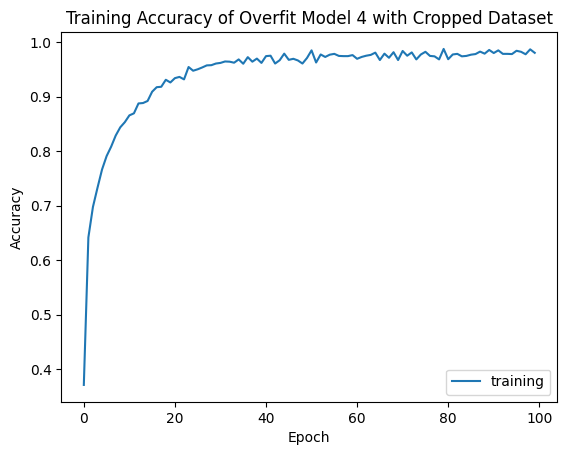

In [ ]:
plt.title('Training Accuracy of Overfit Model 4 with Cropped Dataset')
plt.plot(history5.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
loss, acc = overfit_model_5.evaluate(crop_overfit_data)

print(f'Accuracy: {acc*100.0}')
print(f'Loss:{loss}')

2650/2650 [==============================] - 7s 3ms/step - loss: 0.1386 - accuracy: 0.9728
Accuracy: 97.28301763534546
Loss:0.13857360184192657


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(crop_overfit_data)):
   x, y = crop_overfit_data.next()
   p = overfit_model_5.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9728301886792453
Precision: 0.9733671061534379
Recall: 0.9728301886792453
F1 Score: 0.9728150572998993


###4.3 Revised Data Model 5

Model Structure:
- 4 Convolutional layers with 256, 128, 64, and 32 kernels, each using a relu activation function
- 3 MaxPool layers that follow the first and second convolutional layers with a (4,4), (2,2) and (2,2) pooling windows
- 1 Flatten Layer after the third convulutional layer
- 1 Dense Layer with 5 neurons using a softmax activation function

In [ ]:
overfit_model_6 = Sequential()

overfit_model_6.add( Conv2D( 256, ( 3, 3 ), activation = 'relu', input_shape = crop_overfit_data.image_shape ) )
overfit_model_6.add( MaxPool2D(4,4) )
overfit_model_6.add( Conv2D( 128, ( 3, 3 ), activation = 'relu', ))
overfit_model_6.add( MaxPool2D(2,2) )
overfit_model_6.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
overfit_model_6.add( MaxPool2D(2, 2) )
overfit_model_6.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
overfit_model_6.add( Flatten() )
overfit_model_6.add( Dense(5, activation = 'softmax' ) )

overfit_model_6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 98, 98, 256)       7168      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 24, 24, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 22, 22, 128)       295040    
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 11, 11, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 9, 9, 64)          73792     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 4, 4, 64)        

In [ ]:
overfit_model_6.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history6 = overfit_model_6.fit(crop_overfit_data, epochs = 100, batch_size = 64)

Epoch 1/100
2650/2650 [==============================] - 14s 5ms/step - loss: 1.6178 - accuracy: 0.2038
Epoch 2/100
2650/2650 [==============================] - 11s 4ms/step - loss: 1.1584 - accuracy: 0.5291
Epoch 3/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.9367 - accuracy: 0.6343
Epoch 4/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.8202 - accuracy: 0.6792
Epoch 5/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.7702 - accuracy: 0.6981
Epoch 6/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.7295 - accuracy: 0.7200
Epoch 7/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.6924 - accuracy: 0.7306
Epoch 8/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.6880 - accuracy: 0.7336
Epoch 9/100
2650/2650 [==============================] - 11s 4ms/step - loss: 0.6505 - accuracy: 0.7498
Epoch 10/100
2650/2650 [==============================] - 11s 4m

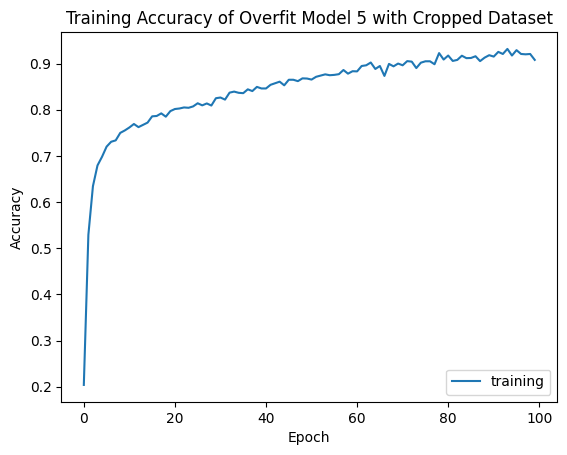

In [ ]:
plt.title('Training Accuracy of Overfit Model 5 with Cropped Dataset')
plt.plot(history6.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
loss, acc = overfit_model_5.evaluate(crop_overfit_data)

print(f'Accuracy: {acc*100.0}')
print(f'Loss:{loss}')

2650/2650 [==============================] - 7s 3ms/step - loss: 0.0669 - accuracy: 0.9815
Accuracy: 98.15094470977783
Loss:0.06689804047346115


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(crop_overfit_data)):
   x, y = crop_overfit_data.next()
   p = overfit_model_6.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9471698113207547
Precision: 0.9473041835058088
Recall: 0.9471698113207547
F1 Score: 0.9471048222224248


###4.4 Conclusion
While none of these models achieved a perfect 100% accuracy on the data I do believe that they are overfit. The patterns in the data is incredibly complex even with the cropping so a true 100% accuracy would be very difficult to achieve.

##5. Output as Input Model using the New Cropped Data
If we provide the output as the input (as an additional channel), what is the smallest architecture (minimum number of layers and filters) needed to overfit the data?

This simpler data has been working better but lets try the output as input experiment again with this new data.

###5.1 Making a Dataset with the Cropped Images and includes the Output as Input

In [ ]:
crop_image_generator = image_generator.flow_from_directory( '/tmp/Cropped_Dataset', target_size=(small_image_length, small_image_length), batch_size=1, class_mode='categorical')
crop_datax = np.zeros((crop_image_generator.n, small_image_length, small_image_length, 3 + 1))  # One additional channel for labels
crop_datay = np.zeros((crop_image_generator.n, 5))

# Read generator, and fill up the mydatax/mydatay arrays
for i in range(crop_image_generator.n):
    x, y = crop_image_generator.next()  # Get images and labels from the generator
    # y is one-hot encoded, need to convert y to a single value
    crop_datax[i, :, :, :3] = x  # Existing image in the first three channels
    crop_datax[i, :, :, 3] = np.argmax(y, axis=1)  # Label value as the last channel
    crop_datay[i] = y

# Print shapes to verify
print("Images Shape:", crop_datax.shape)
print("Labels Shape:", crop_datay.shape)

Found 2650 images belonging to 5 classes.
Images Shape: (2650, 100, 100, 4)
Labels Shape: (2650, 5)


###5.2 Building Output as Input Model 2
Model Structure:
- 1 Convolutional layers with 1 kernel, using a relu activation function
- 1 Flatten Layer after the third convulutional layer
- 1 Dense Layer with 5 neurons using a softmax activation function

In [ ]:
output_model_3 = Sequential()
output_model_3.add( Conv2D(1, ( 3, 3 ), activation = 'relu', input_shape = (small_image_length, small_image_length, 4) ) )
output_model_3.add( Flatten() )
output_model_3.add( Dense(5, activation = 'softmax' ) )

output_model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 98, 98, 1)         37        
                                                                 
 flatten_6 (Flatten)         (None, 9604)              0         
                                                                 
 dense_7 (Dense)             (None, 5)                 48025     
                                                                 
Total params: 48062 (187.74 KB)
Trainable params: 48062 (187.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
output_model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history_output_3 = output_model_3.fit(crop_datax, crop_datay, epochs = 50, batch_size = 64)

Epoch 1/50
42/42 [==============================] - 1s 7ms/step - loss: 1.6067 - accuracy: 0.2192
Epoch 2/50
42/42 [==============================] - 0s 7ms/step - loss: 1.3195 - accuracy: 0.3555
Epoch 3/50
42/42 [==============================] - 0s 7ms/step - loss: 1.0955 - accuracy: 0.5494
Epoch 4/50
42/42 [==============================] - 0s 7ms/step - loss: 1.0365 - accuracy: 0.6147
Epoch 5/50
42/42 [==============================] - 0s 7ms/step - loss: 0.9918 - accuracy: 0.6630
Epoch 6/50
42/42 [==============================] - 0s 7ms/step - loss: 0.9435 - accuracy: 0.6581
Epoch 7/50
42/42 [==============================] - 0s 7ms/step - loss: 0.9003 - accuracy: 0.6675
Epoch 8/50
42/42 [==============================] - 0s 7ms/step - loss: 0.8548 - accuracy: 0.6834
Epoch 9/50
42/42 [==============================] - 0s 7ms/step - loss: 0.8141 - accuracy: 0.7717
Epoch 10/50
42/42 [==============================] - 0s 7ms/step - loss: 0.7702 - accuracy: 0.8291
Epoch 11/50
42/42 [

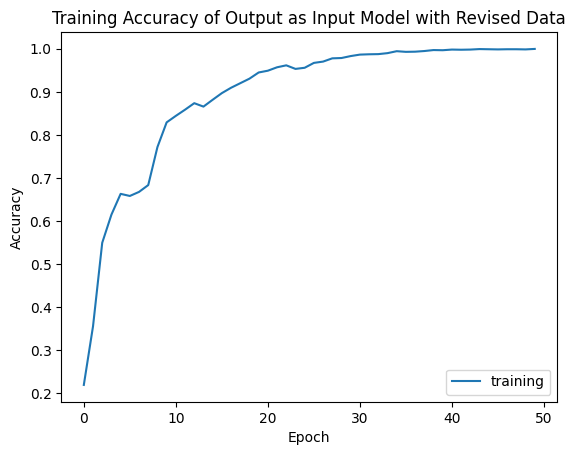

In [ ]:
plt.title('Training Accuracy of Output as Input Model with Revised Data')
plt.plot(history_output_3.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
history_output_3 = output_model_3.fit(crop_datax, crop_datay, epochs = 50, batch_size = 64)

Epoch 1/50
42/42 [==============================] - 0s 8ms/step - loss: 0.0316 - accuracy: 0.9996
Epoch 2/50
42/42 [==============================] - 0s 7ms/step - loss: 0.0302 - accuracy: 0.9996
Epoch 3/50
42/42 [==============================] - 0s 7ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 4/50
42/42 [==============================] - 0s 7ms/step - loss: 0.0261 - accuracy: 1.0000
Epoch 5/50
42/42 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 1.0000
Epoch 6/50
42/42 [==============================] - 0s 7ms/step - loss: 0.0233 - accuracy: 1.0000
Epoch 7/50
42/42 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 1.0000
Epoch 8/50
42/42 [==============================] - 0s 7ms/step - loss: 0.0207 - accuracy: 1.0000
Epoch 9/50
42/42 [==============================] - 0s 7ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 10/50
42/42 [==============================] - 0s 7ms/step - loss: 0.0181 - accuracy: 1.0000
Epoch 11/50
42/42 [

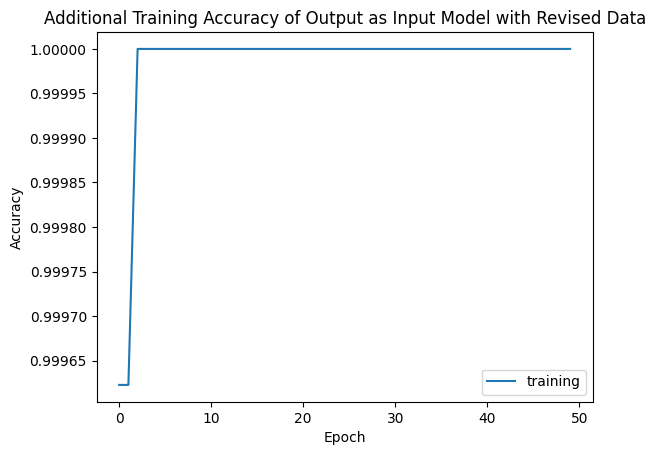

In [ ]:
plt.title('Additional Training Accuracy of Output as Input Model with Revised Data')
plt.plot(history_output_3.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
predictions = output_model_3.predict(crop_datax)

# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(predictions, axis=1)
Y_true = np.argmax(crop_datay, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

38/38 [==============================] - 1s 28ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


###5.3 Conclusion on Revised Model Output as Input

Like the first output as input model, you do not need a very large model to create an overfit model if you also provide the class labels with the input. The model is able to learn that the output labels in the 4th channel are related to the desired output. This model took a bit longer to learn this pattern. I believe this is because there are simpler patterns in the cropped data for the model to learn. In the earlier experiment with the full images the model learned very quickly to use the 4th channel to overfit, however from the other experiments completed with the full data it was clear that the model was not capable of learning the more complex patterns so the only pattern it needed to learn was that the channel labels were related to desired results. With the smaller cropped images the model is now learning other patterns from the images and I think this slowed down the training.